In [27]:
import pandas as pd
%run utils.ipynb

In [28]:
data_paths = load_data_paths("out_paths")

dos_df_path = data_paths["dos_df"]
fuzzy_df_path = data_paths["fuzzy_df"]
attack_free_df_path = data_paths["attack_free_df"]

dos_df = pd.read_csv(dos_df_path)
fuzzy_df = pd.read_csv(fuzzy_df_path)
attack_free_df = pd.read_csv(attack_free_df_path)


# Exploratory Data Analysis

## Common Methods

In [29]:
bytes_col_list=[col for col in dos_df.columns if col.startswith("byte")]


In [30]:
def show_shape_info_of_data(data):
    print("Data Shape")
    print("*" * 40)
    print(f"Rows: {data.shape[0]}, Columns: {data.shape[1]}")
    print("\nInfo")
    print("*" * 40)
    info_dict={
        "Column": data.columns,
        "Data Type": data.dtypes,
        "Null Count": data.isnull().sum(),
        "Unique Count":data.nunique()}
    info_df = pd.DataFrame(info_dict)
    print(info_df.to_string(index=False))


In [31]:
def concatenate_columns(cols, new_column_name,data):
    """
    Merges multiple columns into a single column by concatenating their values.

    Parameters
    ----------
    cols : list[str]
        List of column names to be merged.
    new_column_name : str
        Name of the new column that will store the merged values.
    data : pd.DataFrame
        The DataFrame containing the columns to be merged.

    Returns
    -------
    pd.DataFrame
        Updated DataFrame with the new merged column.
    """
    data[new_column_name] = ""
    for col in cols:
        data[new_column_name] += data[col]
    return data


In [32]:
def convert_timestamp_to_datetime(col_to_be_added_name,existing_col_name, data):
    """
    Convert timestamp column to a datetime column .

    Parameters
    ----------
    col_to_be_added_name : str
        Name of the new column to store the converted datetime values.
    existing_col_name : _type_
        Name of existing column containing timestamps in seconds
    data : pd.DataFrame
        DataFrame containing the existing column.

    Returns
    -------
    pd.DataFrame
        DataFrame with the new datetime column added
    """

    data[col_to_be_added_name] = pd.to_datetime(data[existing_col_name], unit='s')
    return data

In [33]:
def extract_datetime_components(existing_col_name,data):
    """
    Extracts year, month, day, and hour from a datetime column and adds them as new columns.

    Parameters
    ----------
    existing_col_name : str
        The name of the column containing datetime values.
    data : pd.DataFrame
        The DataFrame containing the datetime column.

    Returns
    -------
    pd.DataFrame
        DataFrame with added columns: 'year', 'month', 'day', and 'hour'.
    """
    data['year'] = data[existing_col_name].dt.year
    data['month'] = data[existing_col_name].dt.month
    data['day'] = data[existing_col_name].dt.day
    data['hour']=data[existing_col_name].dt.hour

    return data


In [34]:
def print_start_end_timestamps(data,column_name):
    """
    Prints the start and end timestamps from a specified column in a DataFrame.

    Parameters
    ----------
    data : pd.DataFrame
        The DataFrame containing the timestamp column.
    column_name : str
        The name of the column containing timestamp values.

    Returns
    -------
    None
        This function prints the start and end timestamps but does not return anything.
    """
    print("Start Time: ",data[column_name].iloc[0])
    print("End Time: ",data[column_name].iloc[-1])

In [35]:
def convert_hex_to_int(value):
    """
    Converts a hexadecimal string to an integer. If the value is already an integer, it is returned as is.

    Parameters
    ----------
    value : str | int
        The value to convert. If a string, it should represent a valid hexadecimal number.

    Returns
    -------
    int
        The converted integer value.

    Raises
    ------
    ValueError
        If the string is not a valid hexadecimal number.
    """
    if isinstance(value, str):
        try:
            return int(value,16)
        except ValueError:
            raise ValueError(f"Invalid hexadecimal value: {value}")
    return value  

In [36]:
def convert_hex_bytes_to_int(data,bytes_col_list):
    """
    Convert hexadecimal byte values in specified columns to integers.

    Parameters
    ----------
    data : pandas.DataFrame
        The DataFrame containing the columns to convert.
    bytes_col_list : list
        A list of column names containing hexadecimal values as strings.

    Returns
    -------
    pandas.DataFrame
        The modified DataFrame with specified columns converted to integers.
    """
    for col in bytes_col_list:
        if col in data.columns:
            data[col] = data[col].apply(convert_hex_to_int)
    return data
    

In [37]:
def print_unique_datetime_components (data):
    """
    Prints the unique values of the 'day', 'month', 'year', and 'hour' columns in a DataFrame.

    Parameters
    ----------
    data : pd.DataFrame
        The DataFrame containing 'day', 'month', 'year', and 'hour' columns.

    Returns
    -------
    None
        This function prints unique values but does not return anything.
    """
    for col in ['day','month','year','hour']:
        print(col,data[col].unique())

## DoS

In [38]:
show_shape_info_of_data(dos_df)

Data Shape
****************************************
Rows: 3665770, Columns: 12

Info
****************************************
      Column Data Type  Null Count  Unique Count
   timestamp   float64           0       3665770
      can_id    object           0            27
         dlc     int64           0             2
      byte_0    object           0           108
      byte_1    object           0            71
      byte_2    object       31188            75
      byte_3    object       31188            26
      byte_4    object       31188           190
      byte_5    object       31188           256
      byte_6    object       31188            75
      byte_7    object       31188           256
updated_flag    object           0             2


In [39]:
dos_df.head()

,timestamp,can_id,dlc,byte_0,byte_1,byte_2,byte_3,byte_4,byte_5,byte_6,byte_7,updated_flag
0,1.478198e+09,018f,8,fe,5b,00,00,00,3c,00,00,R
1,1.478198e+09,0260,8,19,21,22,30,08,8e,6d,3a,R
2,1.478198e+09,02a0,8,64,00,9a,1d,97,02,bd,00,R
3,1.478198e+09,0329,8,40,bb,7f,14,11,20,00,14,R
4,1.478198e+09,0545,8,d8,00,00,8a,00,00,00,00,R


In [40]:
dos_df=convert_timestamp_to_datetime("datetime","timestamp", dos_df)


In [41]:
print_start_end_timestamps(dos_df,"datetime")


Start Time:  2016-11-03 18:39:36.389636040
End Time:  2016-11-03 19:26:49.058943987


In [42]:
dos_df=extract_datetime_components("datetime",dos_df)

In [43]:
print_unique_datetime_components (dos_df)


day [3]
month [11]
year [2016]
hour [18 19]


In [44]:
col="can_id"
dos_df["updated_can_id"] = dos_df[col].apply(convert_hex_to_int)

In [45]:
# dos_df["updated_can_id"].value_counts()

In [46]:
col="dlc"
dos_df[col].value_counts()

dlc
8    3634582
2      31188
Name: count, dtype: int64

In [47]:
dos_df[bytes_col_list].head()

,byte_0,byte_1,byte_2,byte_3,byte_4,byte_5,byte_6,byte_7
0,fe,5b,00,00,00,3c,00,00
1,19,21,22,30,08,8e,6d,3a
2,64,00,9a,1d,97,02,bd,00
3,40,bb,7f,14,11,20,00,14
4,d8,00,00,8a,00,00,00,00


In [48]:
dos_df=convert_hex_bytes_to_int(dos_df,bytes_col_list)

In [49]:
dos_df[bytes_col_list].head()

,byte_0,byte_1,byte_2,byte_3,byte_4,byte_5,byte_6,byte_7
0,254,91,0.0,0.0,0.0,60.0,0.0,0.0
1,25,33,34.0,48.0,8.0,142.0,109.0,58.0
2,100,0,154.0,29.0,151.0,2.0,189.0,0.0
3,64,187,127.0,20.0,17.0,32.0,0.0,20.0
4,216,0,0.0,138.0,0.0,0.0,0.0,0.0


In [50]:
#T or R, T represents injected message while R represents normal message
col="updated_flag"
dos_df[col].value_counts()

updated_flag
R    3078249
T     587521
Name: count, dtype: int64

In [51]:
dos_df=concatenate_columns(bytes_col_list,"merged_bytes",dos_df)

TypeError: can only concatenate str (not "int") to str

In [ ]:
col="merged_bytes"
dos_df[col].nunique()

### Insights about DoS Attack

- Data was collected in November 3, 2016 and between 18-19 PM.
- CAN ID
    - Most rows are with id 0. It can be DoS attack.


- DLC
    - It shows length of data field in bytes.
    - It is either 2 or 8.
- Byte0 ... Byte7
    - it shows data field in eight columns in bytes.
    - First two bytes have no null count. Last 5 byte have more than 30k null count. 
    - When you merge 8 columns into one columns, you can seee 66K unique data field.
- Flag
    - It can be T or R
        - T-> injected message
        - R-> normal message
    - Normal message is nearly five times bigger than injected message.


## Fuzzy

In [ ]:
show_shape_info_of_data(fuzzy_df)

In [ ]:
fuzzy_df=convert_timestamp_to_datetime("datetime","timestamp", fuzzy_df)


In [ ]:
print_start_end_timestamps(fuzzy_df,"datetime")

In [ ]:
fuzzy_df=extract_datetime_components("datetime",fuzzy_df)

In [ ]:
print_unique_datetime_components (fuzzy_df)

In [ ]:
col="can_id"
fuzzy_df["updated_can_id"] = fuzzy_df[col].apply(convert_hex_to_int)

In [ ]:
col="updated_can_id"
fuzzy_df[col].value_counts()[:30]

In [ ]:
col="dlc"
fuzzy_df[col].value_counts()

In [ ]:
fuzzy_df=concatenate_columns(bytes_col_list,"merged_bytes",fuzzy_df)

In [ ]:
col="merged_bytes"
fuzzy_df[col].nunique()

In [ ]:
fuzzy_df["updated_flag"].value_counts()

### Insights about Fuzzy Attack
- In attack free data, dlc can be 2 or 8. In fuzzy attack it can be 2,5,6,and 8. 5 and 6 can be quickly find as malicious.
- When we merge bytes columns, fuzzy attack have 560k unique data. Four unique dlc may create this huge unique data number
- 

- Data was collected in November 3, 2016 and between 17-19 PM.
- **End time of Dos and Fuzzy Attack is same**
        - dos df
    
            Start Time:  2016-11-03 18:39:36.389636040
            End Time:  2016-11-03 19:26:49.058943987
    
        - fuzzy df
    
            Start Time:  2016-11-03 17:55:21.905735970
            End Time:  2016-11-03 19:26:49.058943987

- CAN ID
    - There are unique 2048 values.
    - Most used id is 790.

- DLC
    - It shows length of data field in bytes.
    - It can be 2,5,6,8.
    - We should delete rows with dlc is 2,5,6. Because, they are rare.
            dlc
        - 8  -  3751023
        - 5   -   53451
        - 2    -  34382
        - 6   -       3

- Byte0 ... Byte7
    - it shows data field in eight columns in bytes.
    - First two bytes have no null count. Byte_2-Byte_4 have 35k null count, Byte_5-Byte_7 have 88k null count.
    - When you merge 8 columns into one columns, you can seee 560K unique data field.
- Flag
    - It can be T or R
        - T-> injected message
        - R-> normal message
    - R   - 3.347.012
    - T   -  491.847

## Attack Free

In [ ]:
show_shape_info_of_data(attack_free_df)

In [ ]:
col="timestamp"
attack_free_df=convert_timestamp_to_datetime("datetime","timestamp", attack_free_df)


In [ ]:
print_start_end_timestamps(attack_free_df,"datetime")

In [ ]:
attack_free_df=extract_datetime_components("datetime",attack_free_df)

In [ ]:
print_unique_datetime_components(attack_free_df)


In [ ]:
col="can_id"
attack_free_df["updated_can_id"] = attack_free_df[col].apply(convert_hex_to_int)


In [ ]:
attack_free_df["updated_can_id"].value_counts()

In [ ]:
attack_free_can_id_set=set(attack_free_df["updated_can_id"].unique())
dos_can_id_set=set(dos_df["updated_can_id"].unique())

print("only in dos",dos_can_id_set-attack_free_can_id_set)
print("only in attack free",attack_free_can_id_set-dos_can_id_set)

In [ ]:
col="frame_type"
attack_free_df[col].unique()

In [ ]:
col="dlc"
attack_free_df[col].value_counts()

In [ ]:
bytes_col_list=[col for col in attack_free_df.columns if col.startswith("byte")]
attack_free_df=concatenate_columns(bytes_col_list,"merged_bytes",attack_free_df)

In [ ]:
col="merged_bytes"
attack_free_df[col].nunique()

### Insights about Attack Free
- Data was collected in November 3, 2016 and between 11:03-11:12 PM.
- CAN ID
    - 704 is most used one as an id.
    - When we look at count_values(), we can see number of count values are in  cluster form.
- Frame Type
    - I named 000 as frame_type but not sure whether it is frame_type or not because it can be rtr that show it is standart can frame or extended can frame.
    - Assume it is really frame type. It is value only is 000 and data frame not a remote frame.
- DLC
    - It shows length of data field in bytes.
    - It is either 2,5,8.
    - We should delete 2 and 5.
        - 8  -  928136
        - 5   -  50606
        - 2   -  10129

- Byte0 ... Byte7
    - it shows data field in eight columns in bytes.
    - First two bytes have no null count. Last 3 bytes have more than 60k null count. 
    - When you merge 8 columns into one columns, you can seee 275K unique data field.


    



## General Insights

### Dos df

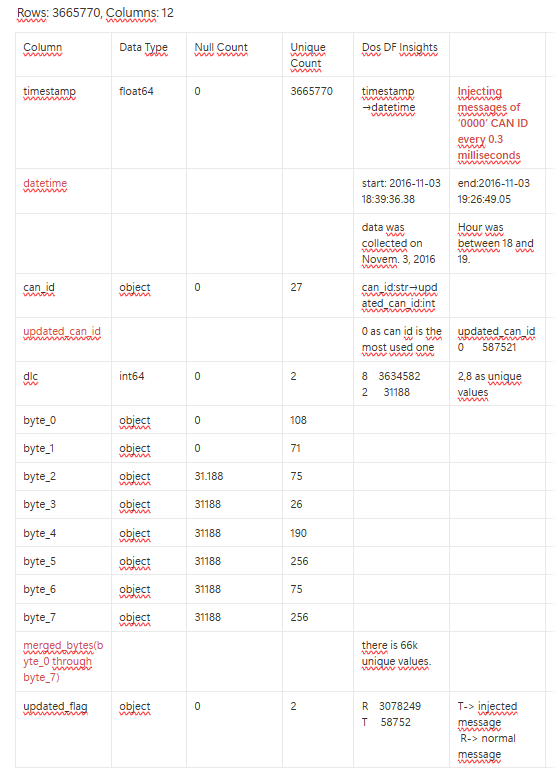

### Fuzzy df

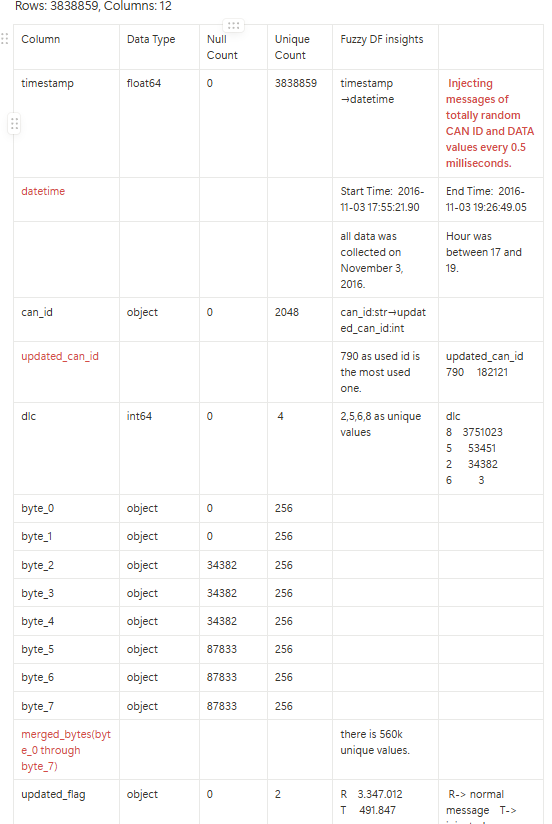

### Attack Free df

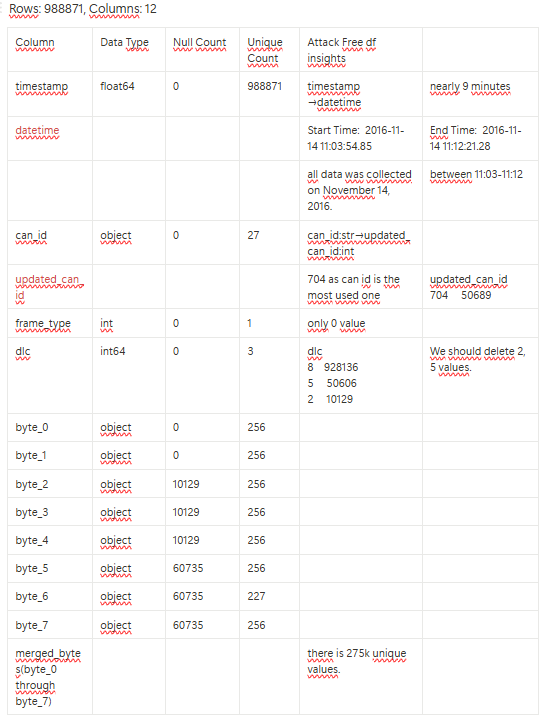

## Import data again

In [ ]:
# dos_df = pd.read_csv(dos_df_path)
# fuzzy_df = pd.read_csv(fuzzy_df_path)
# attack_free_df = pd.read_csv(attack_free_df_path)

## Only Dos DF and its' Attack Free DF

- In dos attack df, there is both attack free and dos df. We may divide them and analyze separetly.

### Only Dos DF

In [ ]:
# only_dos_df=dos_df[dos_df["updated_flag"]=='T']

In [ ]:
# show_shape_info_of_data(only_dos_df)

In [ ]:
# only_dos_df=convert_timestamp_to_datetime("datetime","timestamp", only_dos_df)
# print_start_end_timestamps(only_dos_df,"datetime")

In [ ]:
# col="can_id"
# only_dos_df["updated_can_id"] = only_dos_df[col].apply(convert_hex_to_int)
# only_dos_df["updated_can_id"].unique()

### Only Attack Free DF inside Dos DF

In [ ]:
# attack_free_df_inside_dos_df=dos_df[dos_df["updated_flag"]=='R']


In [ ]:
# show_shape_info_of_data(attack_free_df_inside_dos_df)

In [ ]:
# only_dos_df=convert_timestamp_to_datetime("datetime","timestamp", attack_free_df_inside_dos_df)

# print_start_end_timestamps(attack_free_df_inside_dos_df,"datetime")

In [ ]:
# col="dlc"
# only_dos_df[col].value_counts()

In [ ]:
# bytes_col_list=[col for col in only_dos_df.columns if col.startswith("byte")]
# only_dos_df=concatenate_columns(bytes_col_list,"merged_bytes",only_dos_df)

In [ ]:
# only_dos_df["merged_bytes"].unique()

In [ ]:
# [print(only_dos_df[byte].unique()) for byte in bytes_col_list]